### Les inn csv-filer
Vi bruker seklima.no til å laste ned data vi kan se på i sammenheng med selvinnhentede data over nedbør og temperatur. 
Dette er en oppskrift for hvordan man leser csv-filer inn i python etter at man har lastet ned datasettet. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Pass på at backslashene går rett vei. Dette er windows din default: \. Det blir feil. Vi må bruke denne: /. Eventuelt kan vi skrive en dobbel windows slash: \\, eller sette en 'r' foran stien. Det er best standard å bruke unix syntax, altså /.

In [2]:
sti='W:/Work/Documents/EkteData/EkteData/data'
fil='/soltimer.csv'

sti='W:\\Work\\Documents\\EkteData\\EkteData\\data'
fil='\\soltimer.csv'

sti=r'W:\Work\Documents\EkteData\EkteData\data'
fil='\soltimer.csv'

Bruk pandas til å lese csv-filen. 
- `sep=';'` beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon. 
- Med `index_col` bestemmer du hvilken kolonne du vil sette til venstre og bruke som index. 
- `decimal=','` må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må komma endres til punktum. 
- `dayfirst=True` sørger for at datoen tolkes riktig. Uten denne tolkes det første tallet i datoen som måned. 

In [3]:
df = pd.read_csv(
    sti+fil, sep=';', index_col='Tid(norsk normaltid)', 
    dayfirst=True, decimal=','
)

df er nå en "Pandas DataFrame"

In [116]:
df

,Navn,Stasjon,Solskinnstid (døgn)
Tid(norsk normaltid),,,
29.12.2021,Flesland,SN50500,0.9
30.12.2021,Flesland,SN50500,0.0
31.12.2021,Flesland,SN50500,0.0
01.01.2022,Flesland,SN50500,0.0
04.01.2022,Flesland,SN50500,0.0
NaN,"Data er gyldig per 04.01.2022 (CC BY 4.0), Met...",NaN,NaN


Hvis du nå vil ha tak i f.eks. kun verdien for Solskinnstid den 29 desmeber 2021 skriver du slik:


In [117]:
df['Solskinnstid (døgn)'][0]

0.9

In [118]:
df['Solskinnstid (døgn)']

Tid(norsk normaltid)
29.12.2021    0.9
30.12.2021    0.0
31.12.2021    0.0
01.01.2022    0.0
04.01.2022    0.0
NaN           NaN
Name: Solskinnstid (døgn), dtype: float64

Hvis vi vil plotte disse dataene må vi i dette tilfellet ta vekk den siste linjen med informasjon. Legg merke til at det mangler et par vedier: 2 og 3 januar er falt ut av dette datasettet. Figuren under må leses med dette i bakhodet.

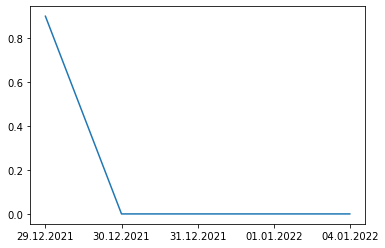

In [119]:
plt.plot(df['Solskinnstid (døgn)'][:-1])
plt.show()

Vi kan også redefinere df så vi slipper å tenke på denne siste linjen. I panda DataFrames angir man navnet til kolonnen først, og så hvilke rader man vil se på. Dette er litt forvirrende siden standard indeksering bruker "row" så "column". `df[:][:-1]` betyr altså "alle kolonner" (`[:]`), og "alle rader utenom den siste" (`[:-1]`).

In [120]:
df=df[:][:-1]

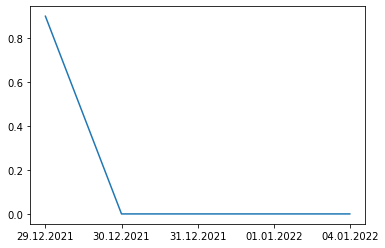

In [121]:
plt.plot(df['Solskinnstid (døgn)'])
plt.show()

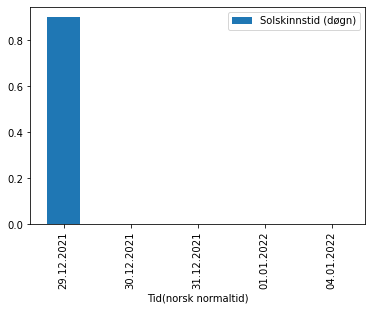

In [122]:
df.plot(kind='bar', y='Solskinnstid (døgn)')
plt.show()

#### Pandas DataFrame til Numpy Array

Du kan gjøre om Pandas DataFrame til et numpy array. Dette er praktisk hvis du f.eks. skal sammenligne et datasett som dette med et du har lest inn som numpy array. Man trenger i blant å konvertere mellom disse to formatene. 

In [123]:
df.to_numpy()

array([['Flesland', 'SN50500', 0.9],
       ['Flesland', 'SN50500', 0.0],
       ['Flesland', 'SN50500', 0.0],
       ['Flesland', 'SN50500', 0.0],
       ['Flesland', 'SN50500', 0.0]], dtype=object)

Siden vi har satt tiden til å være index kommer ikke denne med ved konverteringen. Derfor må vi laste inn csv-filen på nytt uten å spesifisere `index_col` slik at tiden kommer med. 

In [130]:
df = pd.read_csv(
    sti+fil, sep=';', decimal=',', parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True
)
df=df[:][:-1]
df

,Navn,Stasjon,Tid(norsk normaltid),Solskinnstid (døgn)
0,Flesland,SN50500,2021-12-29,0.9
1,Flesland,SN50500,2021-12-30,0.0
2,Flesland,SN50500,2021-12-31,0.0
3,Flesland,SN50500,2022-01-01,0.0
4,Flesland,SN50500,2022-01-04,0.0


Konverter fra DataFrame til numpy array på nytt

In [131]:
data=df.to_numpy()

In [132]:
data

array([['Flesland', 'SN50500', Timestamp('2021-12-29 00:00:00'), 0.9],
       ['Flesland', 'SN50500', Timestamp('2021-12-30 00:00:00'), 0.0],
       ['Flesland', 'SN50500', Timestamp('2021-12-31 00:00:00'), 0.0],
       ['Flesland', 'SN50500', Timestamp('2022-01-01 00:00:00'), 0.0],
       ['Flesland', 'SN50500', Timestamp('2022-01-04 00:00:00'), 0.0]],
      dtype=object)

In [133]:
data[0][-1], data[0,-1]

(0.9, 0.9)

In [134]:
data[0:3]

array([['Flesland', 'SN50500', Timestamp('2021-12-29 00:00:00'), 0.9],
       ['Flesland', 'SN50500', Timestamp('2021-12-30 00:00:00'), 0.0],
       ['Flesland', 'SN50500', Timestamp('2021-12-31 00:00:00'), 0.0]],
      dtype=object)

Hvis du nå plotter en ny figur med numpy arrayet ser du at 2 og 3 januar (der det mangler verdier) tas hensyn til. 

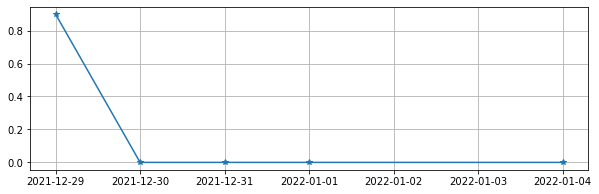

In [137]:
plt.figure(figsize=(10,3))
plt.plot(data[:,2],data[:,3], '*-')
plt.grid()
plt.show()

In [100]:
data[:,-1]

array([0.9, 0.0, 0.0, 0.0, 0.0], dtype=object)